### Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from CartPole import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from numpy.random import default_rng

from utilities import *

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


### Task 1.1


In [45]:
# Equilibrium points

STABLE_POS = 0
STABLE_VEL = 0
STABLE_ANG = np.pi
STABLE_ANG_VEL = 0

UNSTABLE_POS = 0
UNSTABLE_VEL = 0
UNSTABLE_ANG = 0
UNSTABLE_ANG_VEL = 0


n = 6
POS_RANGE = np.linspace(POS_LOW, POS_HIGH, n)
VEL_RANGE = np.linspace(VEL_LOW, VEL_HIGH, n)
ANG_RANGE = np.linspace(ANG_LOW, ANG_HIGH, n)
ANG_VEL_RANGE = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

STEPS = 5
steps = np.linspace(0, STEPS)



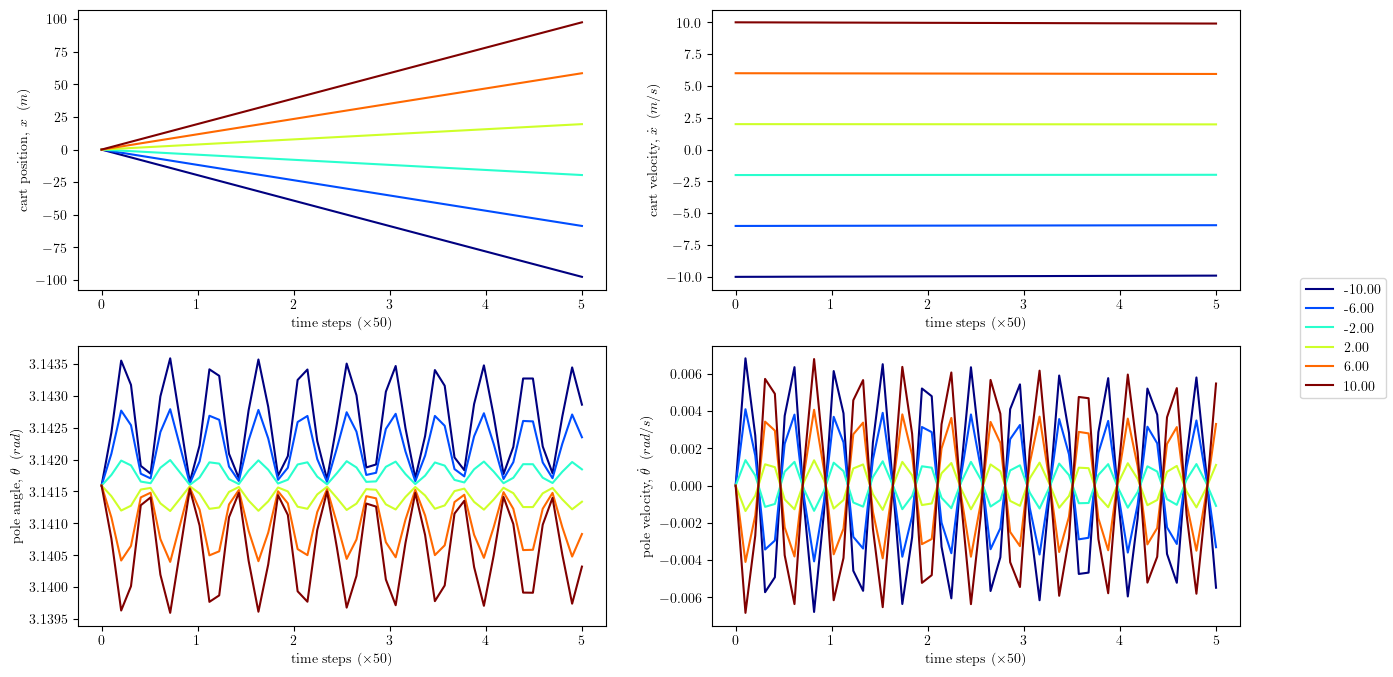

In [46]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps

for i, vel in enumerate(VEL_RANGE):
    y = np.zeros(4)
    state = np.array([STABLE_POS, vel, STABLE_ANG, STABLE_ANG_VEL])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"{vel:.2f}", color=colors[i])
    cp.reset()

fig.legend(loc="right")
fig.savefig("./assets/task1_1__1.pgf")

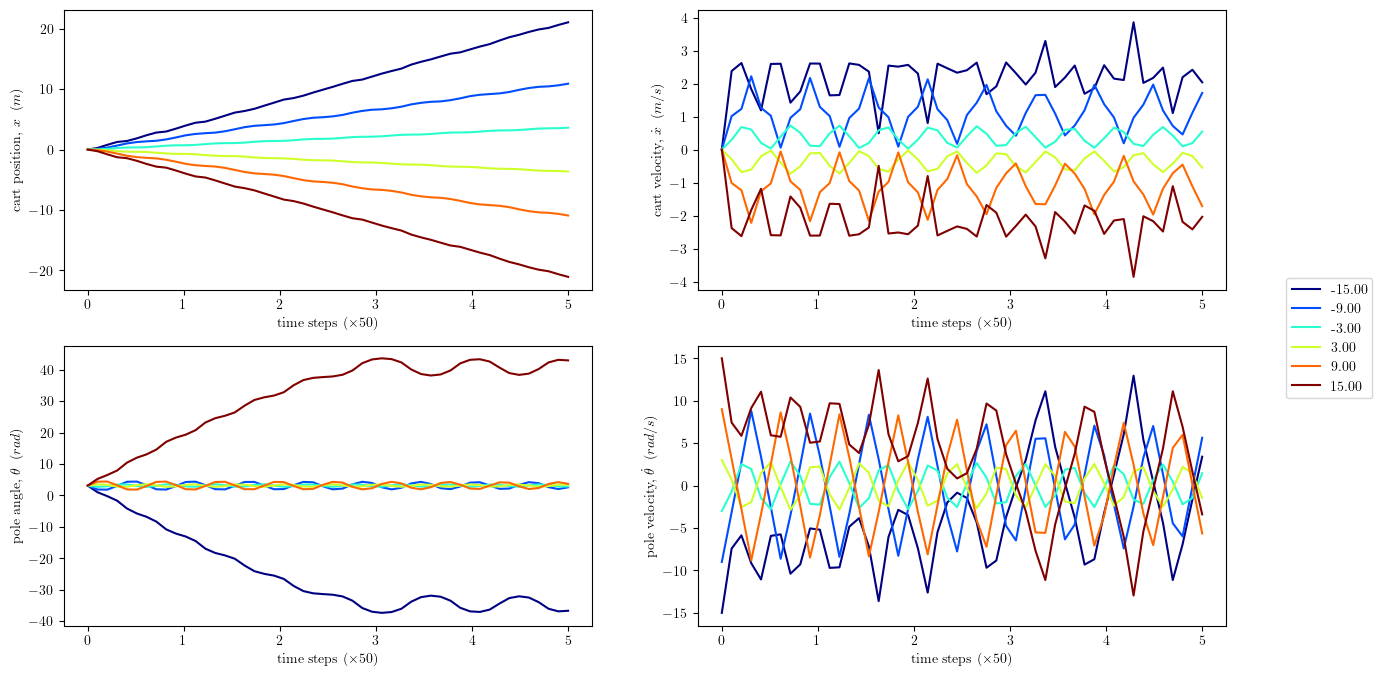

In [47]:
cp = CartPole(False)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
colors = plt.cm.jet(np.linspace(0, 1, n))

x = steps

for i, ang_vel in enumerate(ANG_VEL_RANGE):
    y = np.zeros(4)
    state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, ang_vel])
    cp.setState(state)
    for _ in steps:
        y = np.vstack([y, cp.getState()])
        cp.performAction()
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel=r"time steps ($\times 50$)", label=f"{ang_vel:.2f}", color=colors[i])
    cp.reset()

fig.legend(loc="right")
fig.savefig("./assets/task1_1__2.pgf")


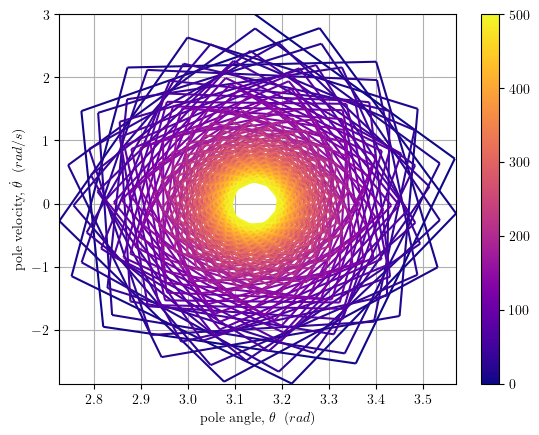

In [75]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 3])
response = np.zeros(4)

cp = CartPole(False)
cp.setState(state)

for _ in steps:
    response = np.vstack([response, cp.getState()])
    cp.performAction()

x00 = response[1:, 2]
y00 = response[1:, 3]

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x00.min(), x00.max())
ax.set_ylim(y00.min(), y00.max())

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__3.pgf")

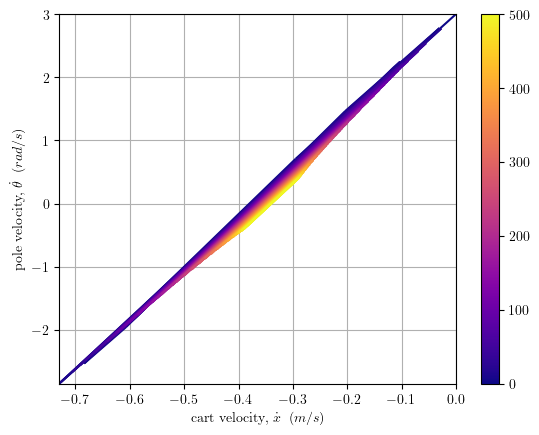

In [76]:
x01 = response[1:, 1]
y01 = response[1:, 3]

points = np.array([x01, y01]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x01.min(), x01.max())
ax.set_ylim(y01.min(), y01.max())

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__4.pgf")

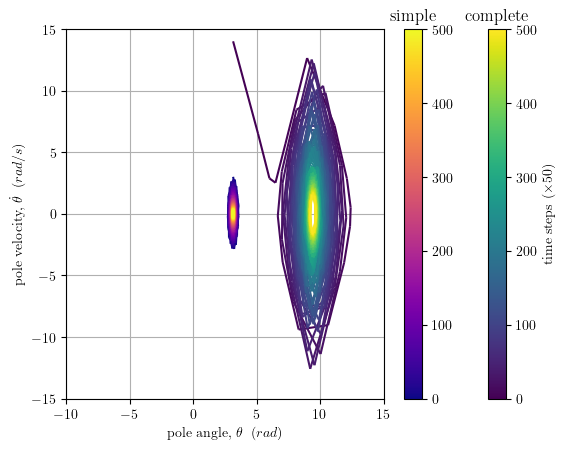

In [85]:
# Large oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])
response = np.zeros(4)

cp = CartPole(False)
cp.setState(state)

for _ in steps:
    response = np.vstack([response, cp.getState()])
    cp.performAction()

x10 = response[1:, 2]
y10 = response[1:, 3]

points = np.array([x10, y10]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('complete')



points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('simple')

ax.set_xlim(-10, 15)
ax.set_ylim(-15, 15)

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__5.pgf")

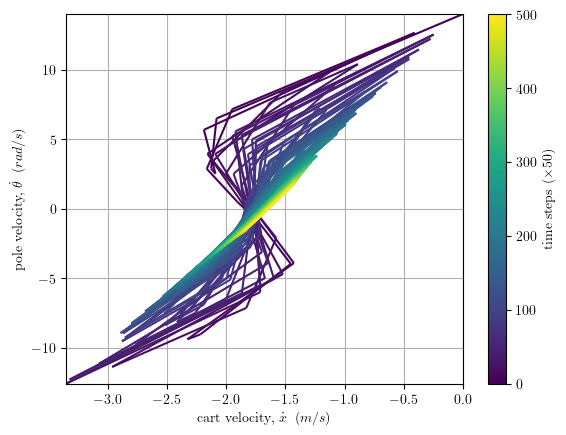

In [87]:
x = response[1:, 1]
y = response[1:, 3]

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_1__6.pgf")

In [ ]:
# Simple oscillations around stable equilibrium, vary angular velocity

# plot_states(x, y, r"$\dot{x}=%.1f, \dot{\theta}=%.1f$" % (state[1], state[3]), fig, axs)

fig, axs = get_subplot("Simple oscillation around stable equilibrium")

n = 6
colors = plt.cm.jet(np.linspace(0,1,n))

pos = np.linspace(0, 0, n)
vel = np.linspace(0, 0, n)
angular_pos = np.linspace(np.pi, np.pi, n)
angular_vel = np.linspace(-15, 15, n)

states = np.vstack([pos, vel, angular_pos, angular_vel]).T

for i in range(n):
    x, y = simulate(False, states[i], 100, False)
    plot_states(x, y, fig, axs, colors[i])
    plt.plot(x, i*y, color=colors[i])



### Task 1.2

In [94]:
rng = default_rng(10)
POS = rng.random()
VEL = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ANG = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ANG_VEL = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW


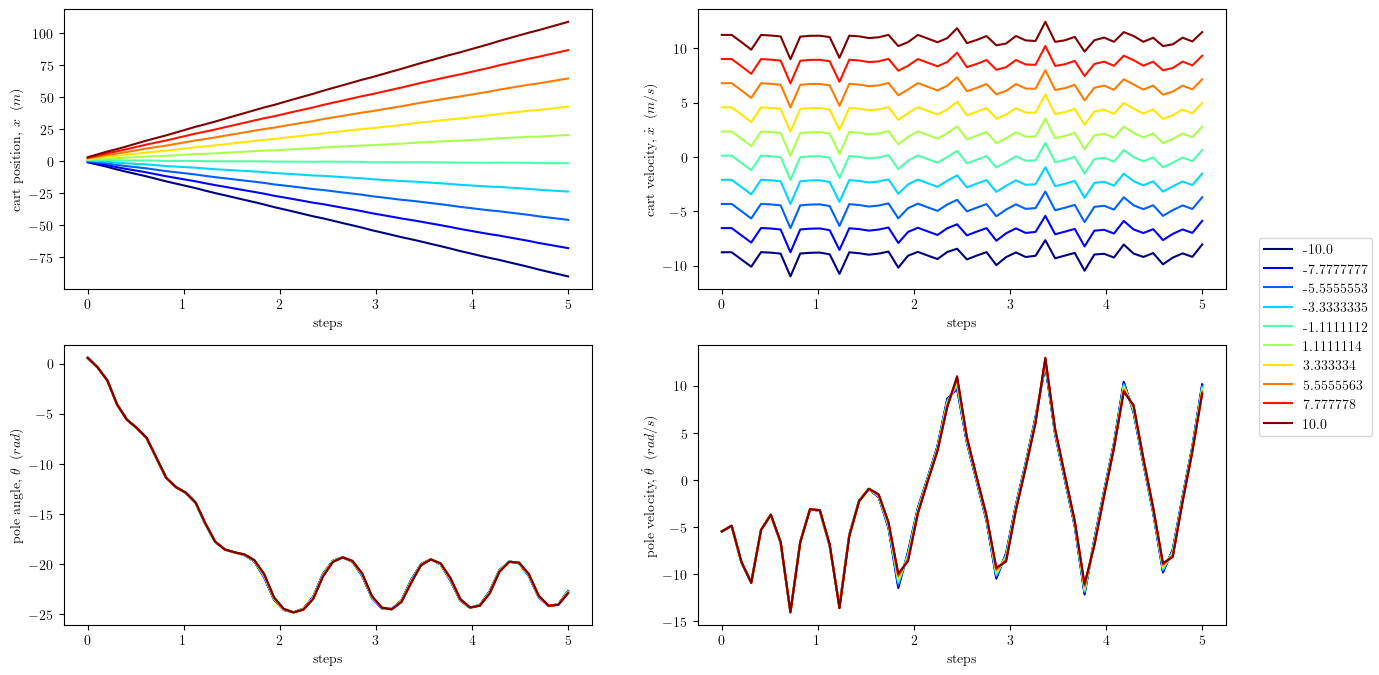

In [95]:
# To sanity check that the state varies linearly with the state for one time step
# Plot below evalualted with 3 time steps

n = 10
cp = CartPole(False)
steps = x = np.linspace(0, STEPS)
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
colors = plt.cm.jet(np.linspace(0,1,n))

for i, vel in enumerate(vels):
    y = np.zeros(4)
    state = np.array([POS, vel, ANG, ANG_VEL])
    cp.setState(state)
    for _ in steps:
        cp.performAction()
        y = np.vstack([y, cp.getState()])
    y = y[1:, :]
    plot_states(x, y, fig=fig, axs=axs, xlabel="steps", label=vel, color=colors[i])
    cp.reset()

fig.legend(loc="right")



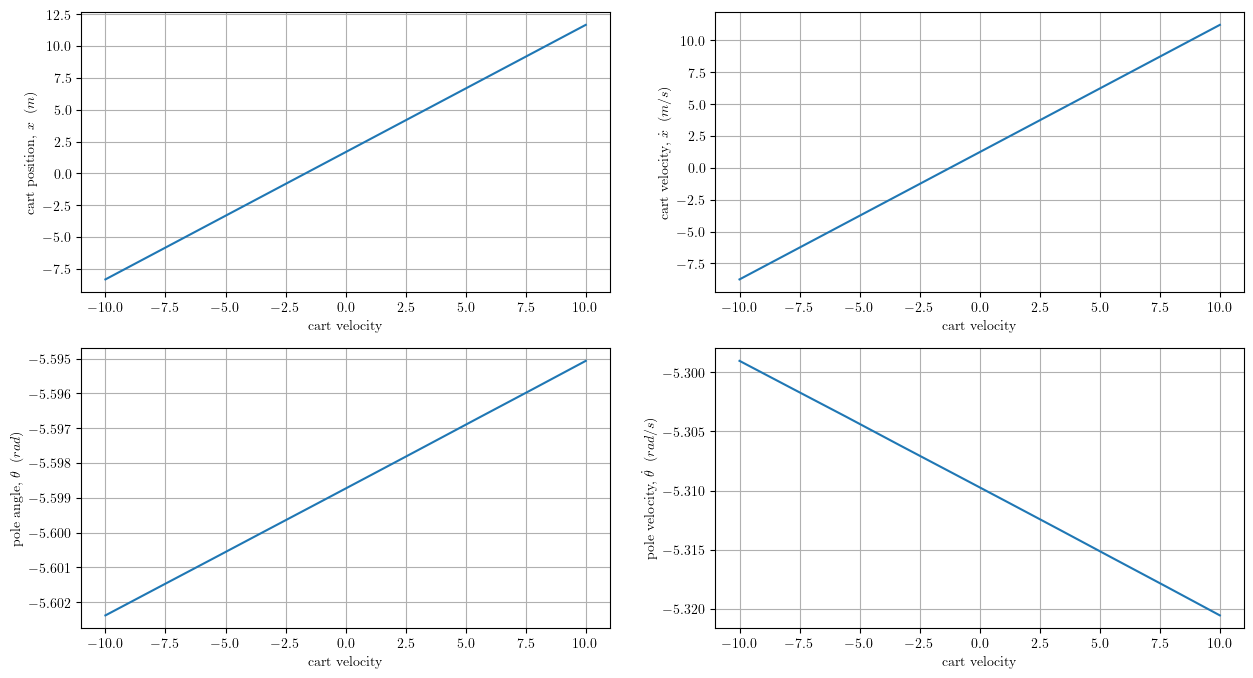

In [96]:
n = 10
cp = CartPole(False)
x = vels = np.linspace(VEL_LOW, VEL_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

y = np.zeros(4)

for vel in vels:
    state = np.array([POS, vel, ANG, ANG_VEL])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="cart velocity")
fig.savefig("./assets/task1_2__1.pgf")

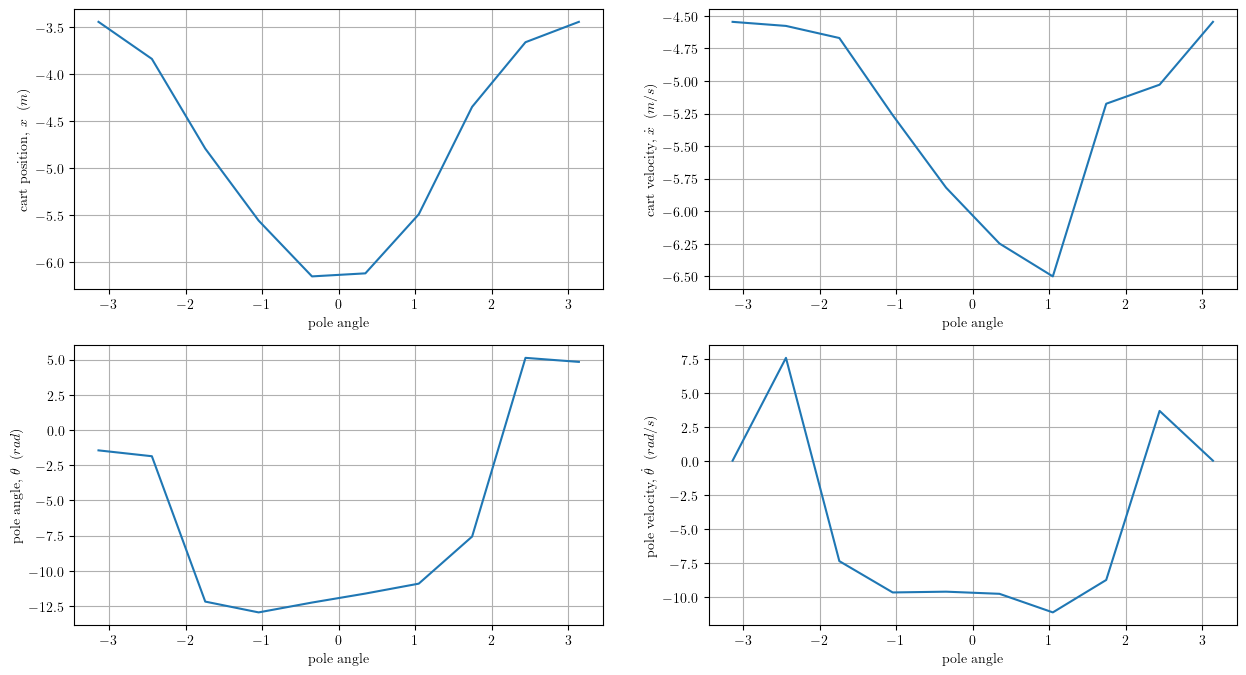

In [97]:
n = 10
cp = CartPole(False)
x = angs = np.linspace(ANG_LOW, ANG_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

y = np.zeros(4)

for ang in angs:
    state = np.array([POS, VEL, ang, ANG_VEL])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="pole angle")
fig.savefig("./assets/task1_2__2.pgf")


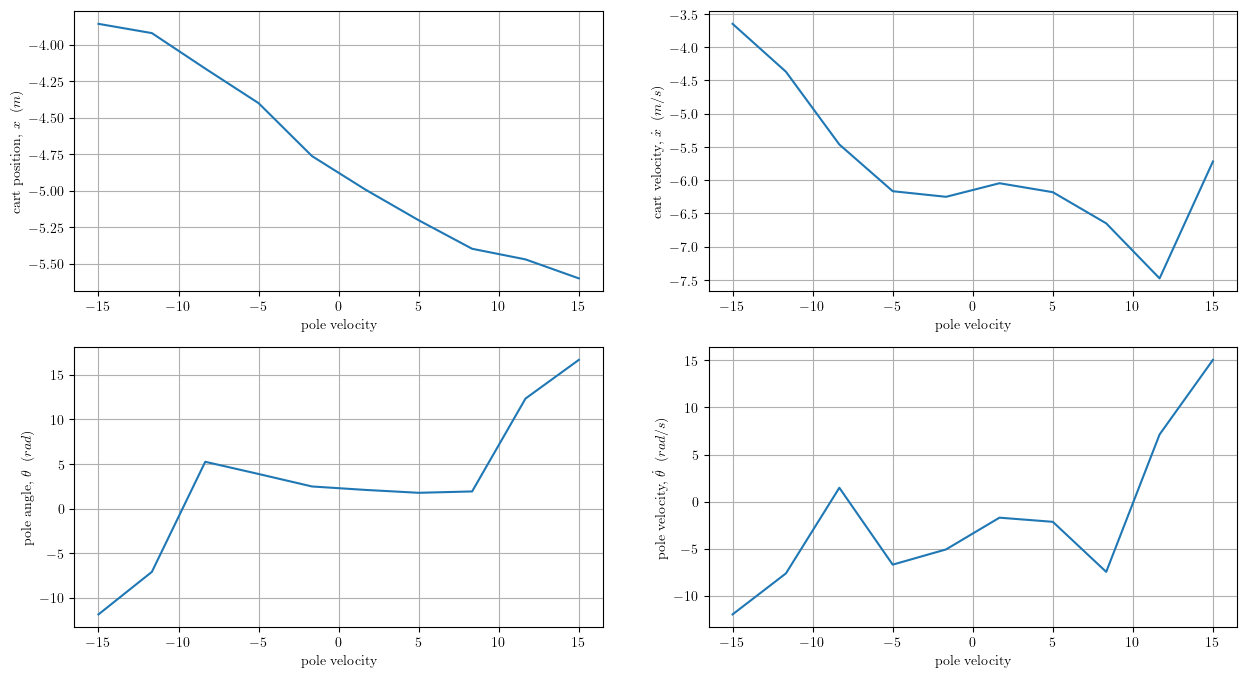

In [98]:
n = 10
cp = CartPole(False)
x = ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

y = np.zeros(4)

for ang_vel in ang_vels:
    state = np.array([POS, VEL, ANG, ang_vel])
    cp.setState(state)
    [cp.performAction() for _ in range(STEPS)]
    y = np.vstack([y, cp.getState()])
    cp.reset()
    
y = y[1:, :]

plot_states(x, y, fig=fig, axs=axs, xlabel="pole velocity")
fig.savefig("./assets/task1_2__3.pgf")



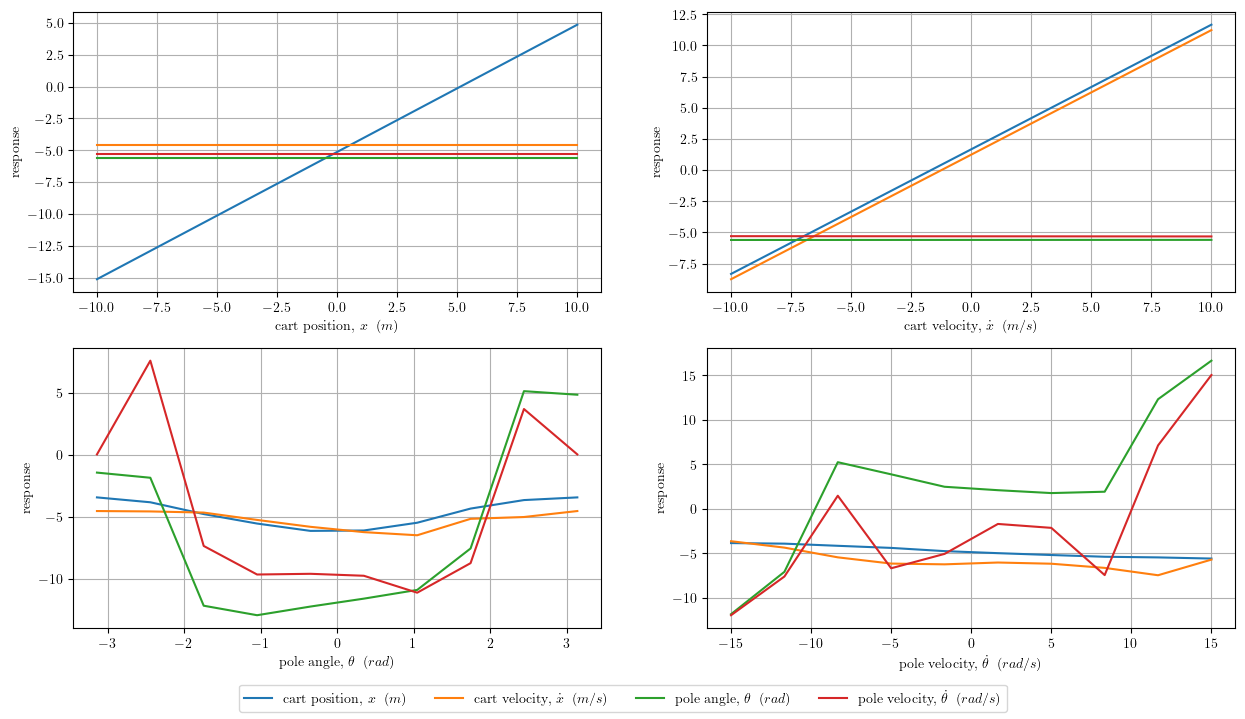

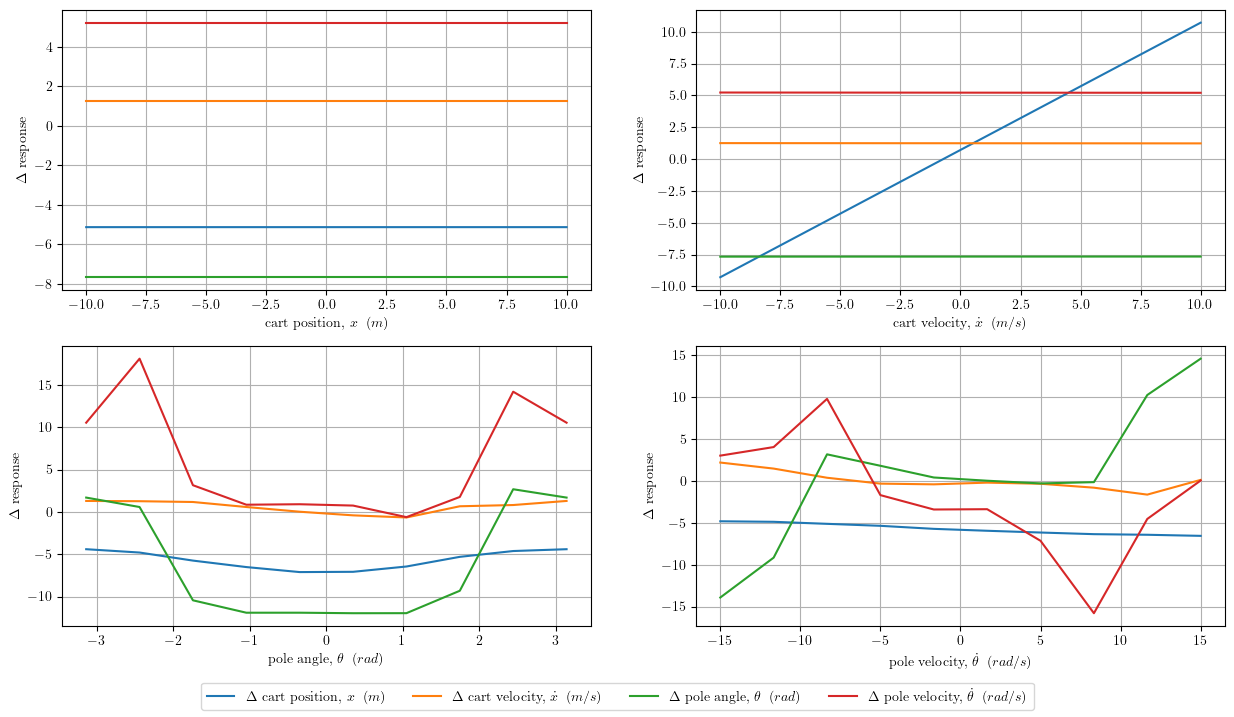

In [99]:
# Model change instead
n = 10

fig1, axs1 = plt.subplots(2, 2, figsize=(15, 8))
fig2, axs2 = plt.subplots(2, 2, figsize=(15, 8)) # measure change
x0 = poss = np.linspace(POS_LOW, POS_HIGH, n)
x1 = vels = np.linspace(VEL_LOW, VEL_HIGH, n)
x2 = angs = np.linspace(ANG_LOW, ANG_HIGH, n)
x3 = ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

xlabels = [STATE0, STATE1, STATE2, STATE3]

for i, x in enumerate([x0, x1, x2, x3]):  
    cp = CartPole(False)
    y1 = np.zeros(4)
    y2 = np.zeros(4)

    for var in x:
        state = [POS, VEL, ANG, ANG_VEL]
        state[i] = var
        y0 = np.array(state)
        cp.setState(y0)
        [cp.performAction() for _ in range(STEPS)]
        y1 = np.vstack([y1, cp.getState()])
        y2 = np.vstack([y2, cp.getState() - y0])
        cp.reset()
    
    y1 = y1[1:, :]
    y2 = y2[1:, :]
    ax1 = axs1[i // 2][i % 2]
    ax2 = axs2[i // 2][i % 2]
    plot_all_states_in_a_subplot(x, y1, fig=fig1, ax=ax1, xlabel=xlabels[i], ylabel="response")
    plot_all_states_in_a_subplot(x, y2, fig=fig2, ax=ax2, xlabel=xlabels[i], ylabel=f"{DELTA} response")


# fig1.legend(xlabels)
# fig2.legend(xlabels)
# fig1.tight_layout()
# fig2.tight_layout()

fig1.legend(loc="lower center", ncol=4, labels=xlabels)
fig1.savefig("./assets/task1_2__4.pgf")

fig2.legend(loc="lower center", ncol=4, labels=[DELTA + l for l in xlabels])
fig2.savefig("./assets/task1_2__5.pgf")

In [100]:
n = 10

poss = np.linspace(POS_LOW, POS_HIGH, n)
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
angs = np.linspace(ANG_LOW, ANG_HIGH, n)
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

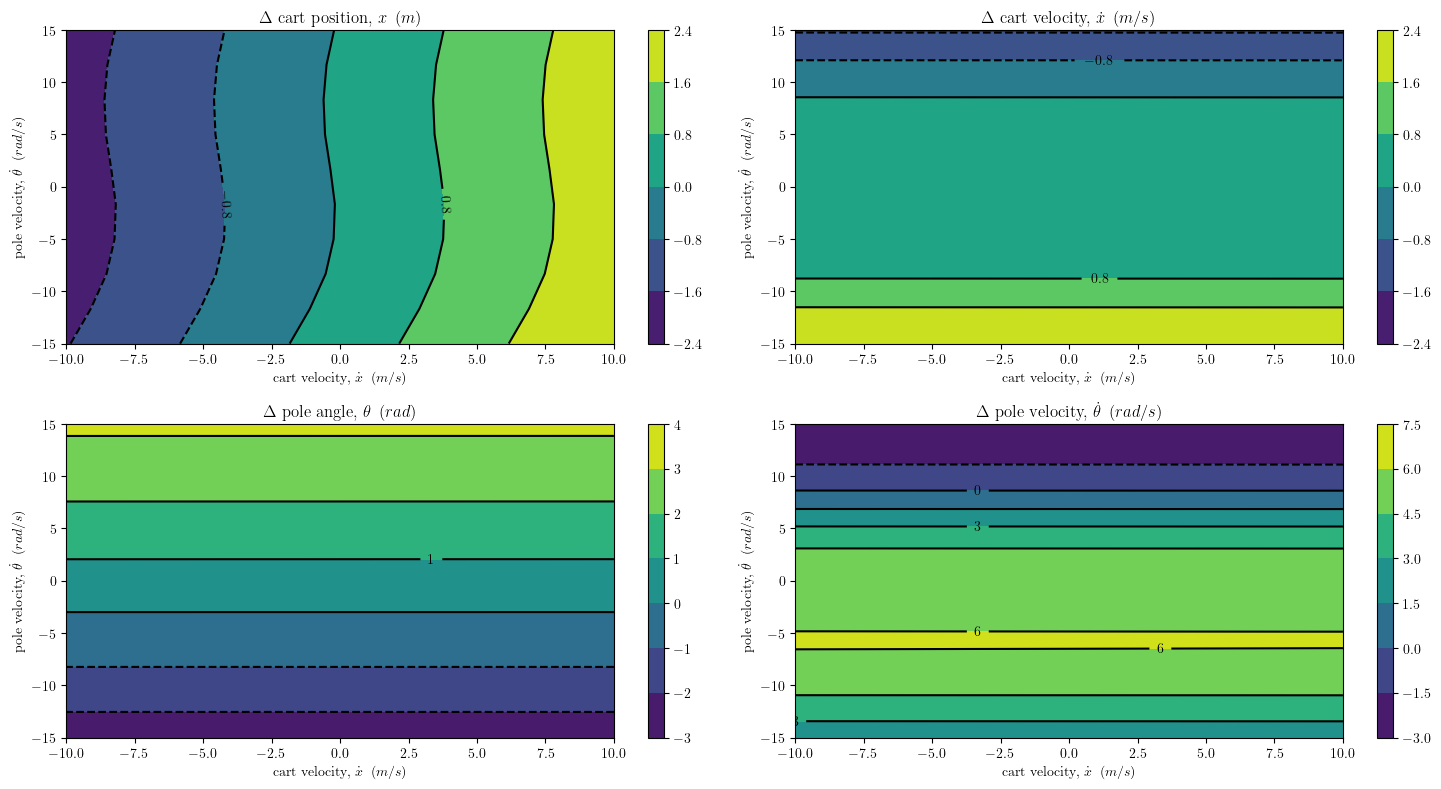

In [141]:
x, y = np.meshgrid(vels, ang_vels, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], ANG, y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_2__6.pgf")
fig.tight_layout()


/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:105: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr2 = axs[0, 1].contourf(x, y, z1, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:106: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr3 = axs[1, 0].contourf(x, y, z2, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:107: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr4 = axs[1, 1].contourf(x, y, z3, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-University

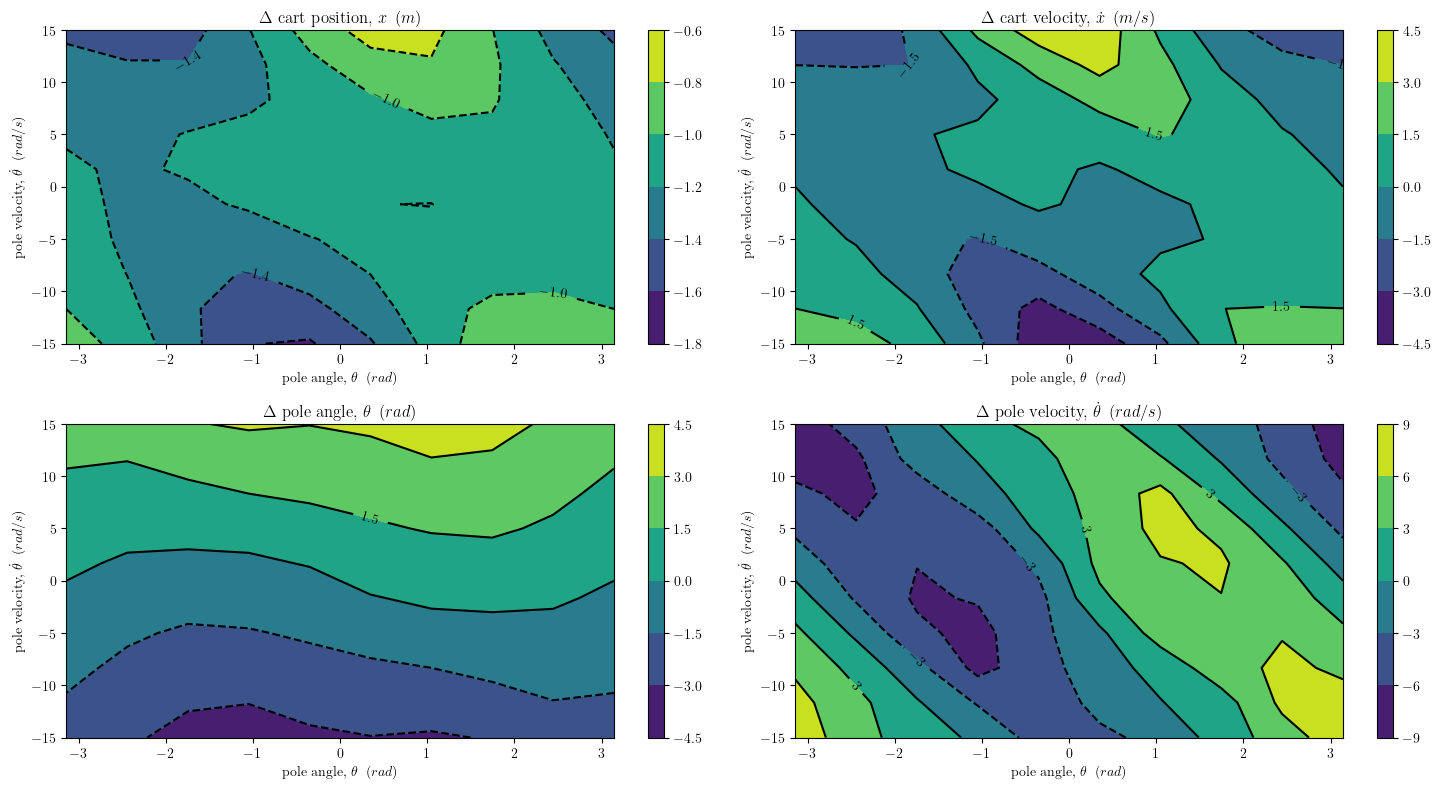

In [145]:
x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, VEL, x[i][j], y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE2, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_2__7.pgf")
fig.tight_layout()


/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:105: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr2 = axs[0, 1].contourf(x, y, z1, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:106: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr3 = axs[1, 0].contourf(x, y, z2, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:107: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  cntr4 = axs[1, 1].contourf(x, y, z3, linestyles='solid', negative_linestyles='dashed')
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-University

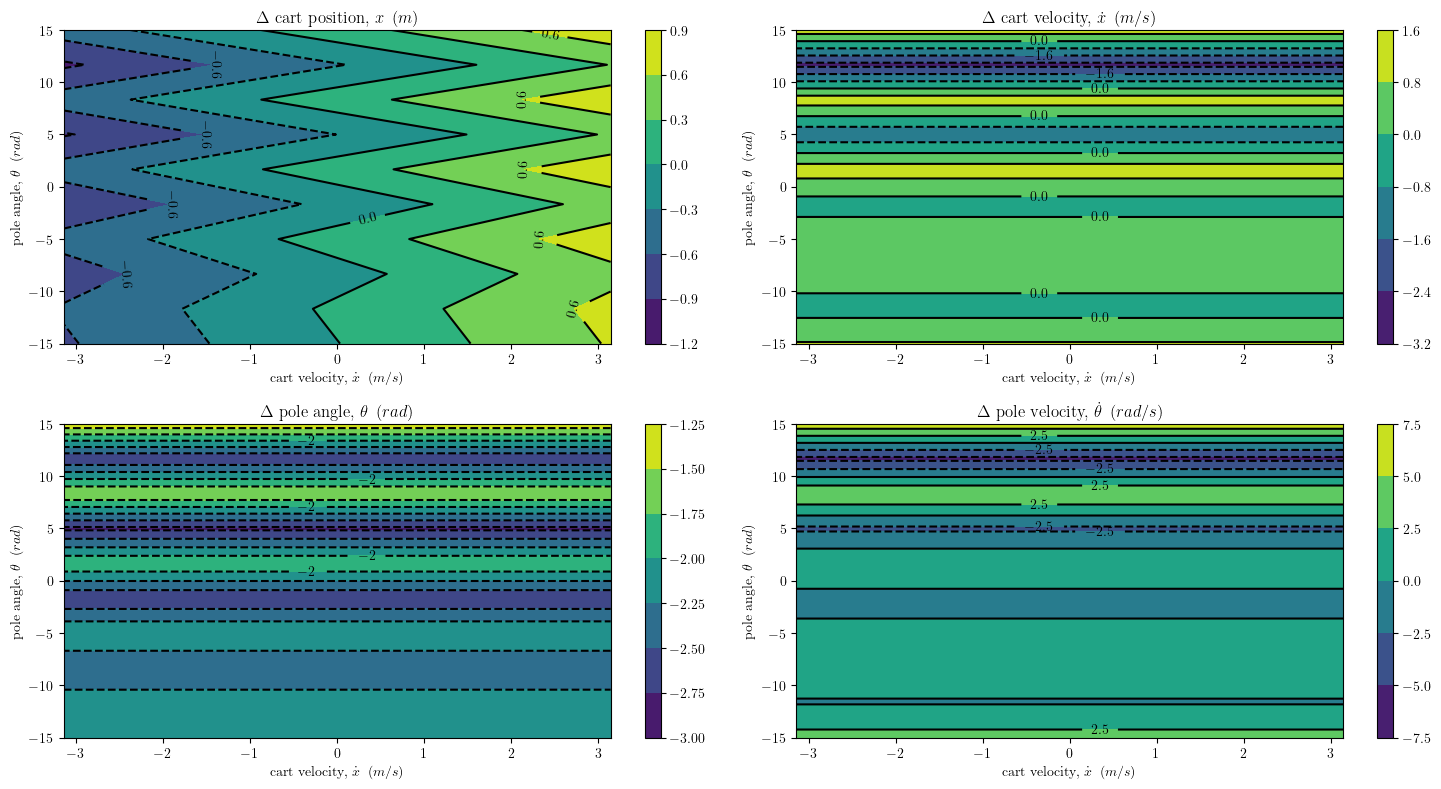

In [144]:
x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_2__8.pgf")
fig.tight_layout()

### Task 1.3

In [5]:
n = 500
rng = default_rng(10)

X0 = rng.random(n) * (POS_HIGH - POS_LOW) + POS_LOW
X1 = rng.random(n) * (VEL_HIGH - VEL_LOW) + VEL_LOW
X2 = rng.random(n) * (ANG_HIGH - ANG_LOW) + ANG_LOW
X3 = rng.random(n) * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW


In [6]:
def simulate(X):
    cp = CartPole(False)
    cp.setState(X)
    cp.performAction()
    return cp.getState() - X

X = np.array([X0, X1, X2, X3]).T
Y = np.apply_along_axis(simulate, axis=1, arr=X)

In [7]:
# Optimal weights

W = np.linalg.inv(X.T @ X) @ X.T @ Y
W.shape


(4, 4)

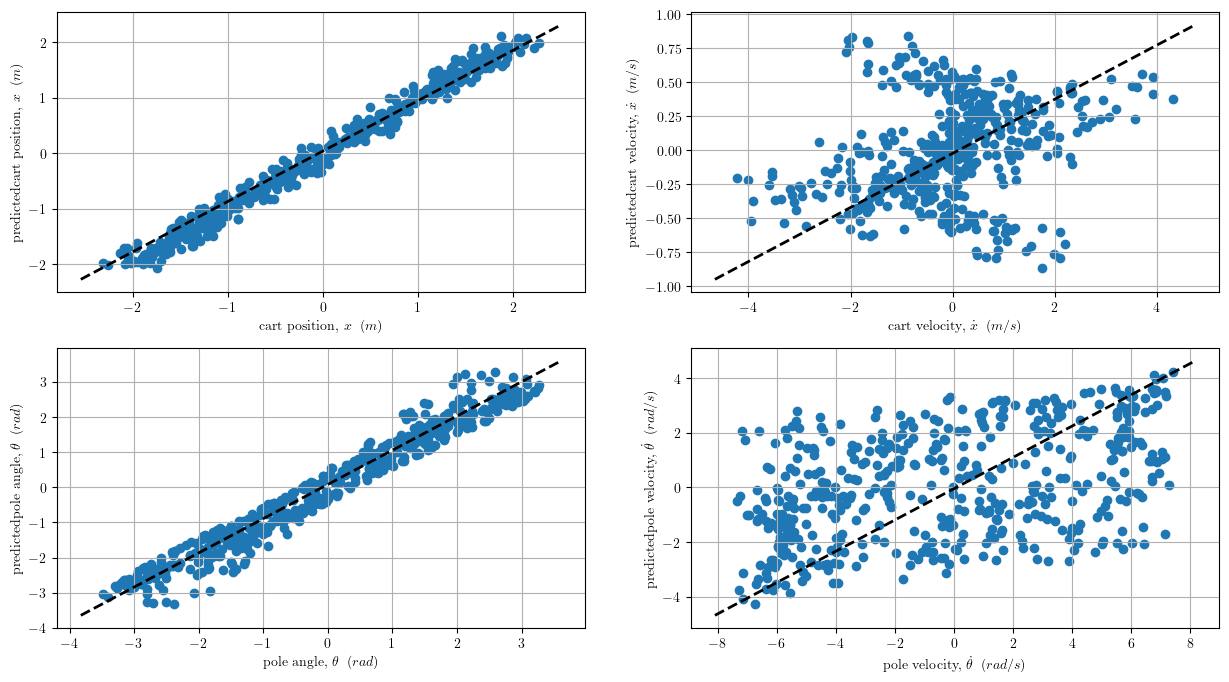

In [8]:
X_hat = X @ W
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

ylabels = [STATE0, STATE1, STATE2, STATE3]
ylabels = ["predicted" + l for l in ylabels]
plot_scatter(x=Y, y=X_hat, fig=fig, axs=axs, ylabels=ylabels)
fig.savefig("./assets/task1_3__1.pgf")

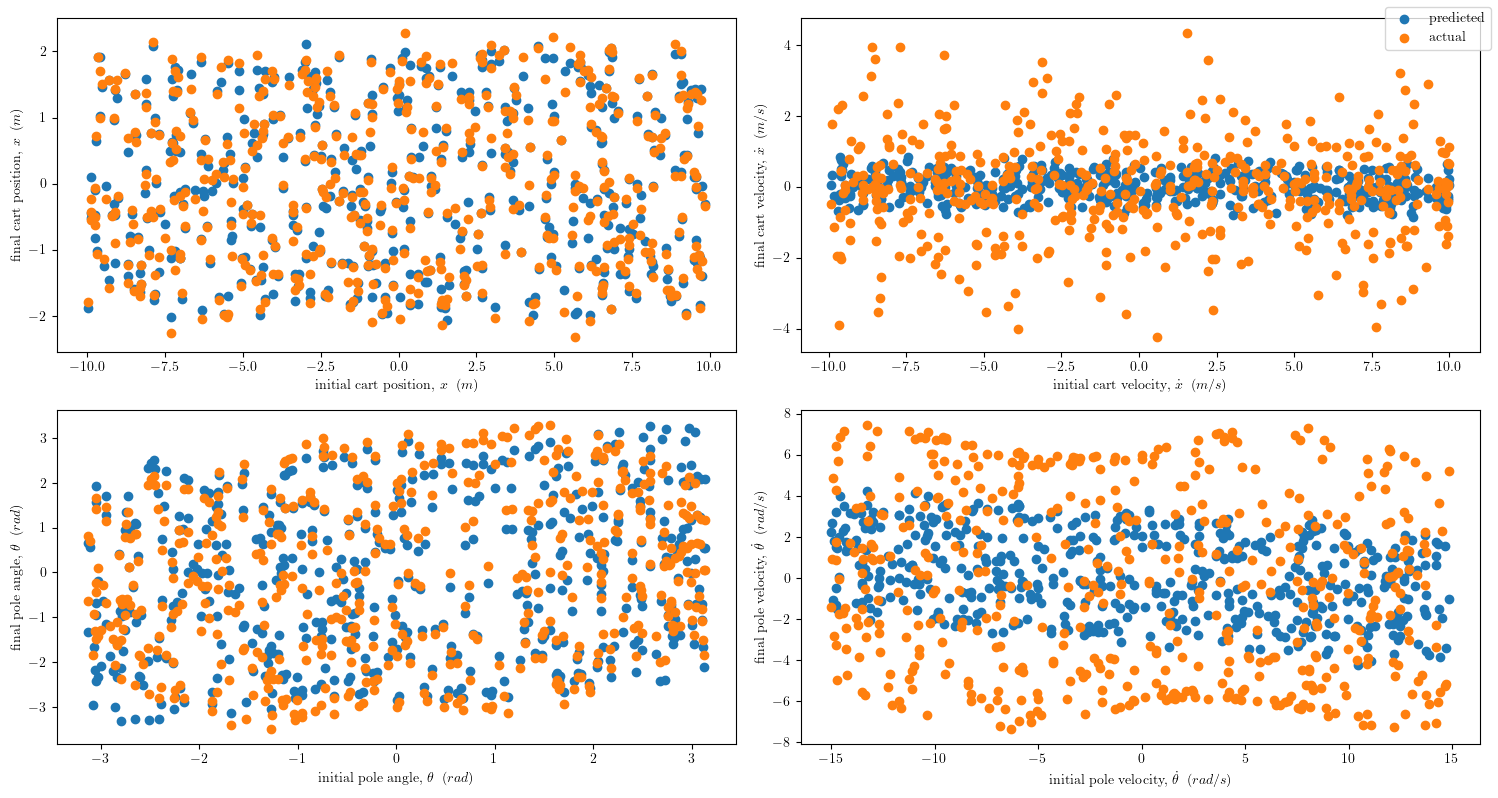

In [105]:
X_hat = X @ W
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

ylabels = ["final " + l for l in [STATE0, STATE1, STATE2, STATE3]]
xlabels = ["initial " + l for l in [STATE0, STATE1, STATE2, STATE3]]
plot_scatter(x=X, y=X_hat, fig=fig, axs=axs, xlabels=xlabels, ylabels=ylabels, diag=False, label='predicted')
plot_scatter(x=X, y=Y, fig=fig, axs=axs, xlabels=xlabels, ylabels=ylabels, diag=False, label='actual')
fig.legend()
fig.tight_layout()
fig.savefig("./assets/task1_3__10.pgf")

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:116: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  c1 = axs[0,0].contour(x, y, z0, colors=colors, levels=LEVELS)
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:117: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  c2 = axs[0,1].contour(x, y, z1, colors=colors, levels=LEVELS)
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py:118: UserWarning: The following kwargs were not used by contour: 'negative_linestyles'
  c3 = axs[1,0].contour(x, y, z2, colors=colors, levels=LEVELS)
/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/utilities.py

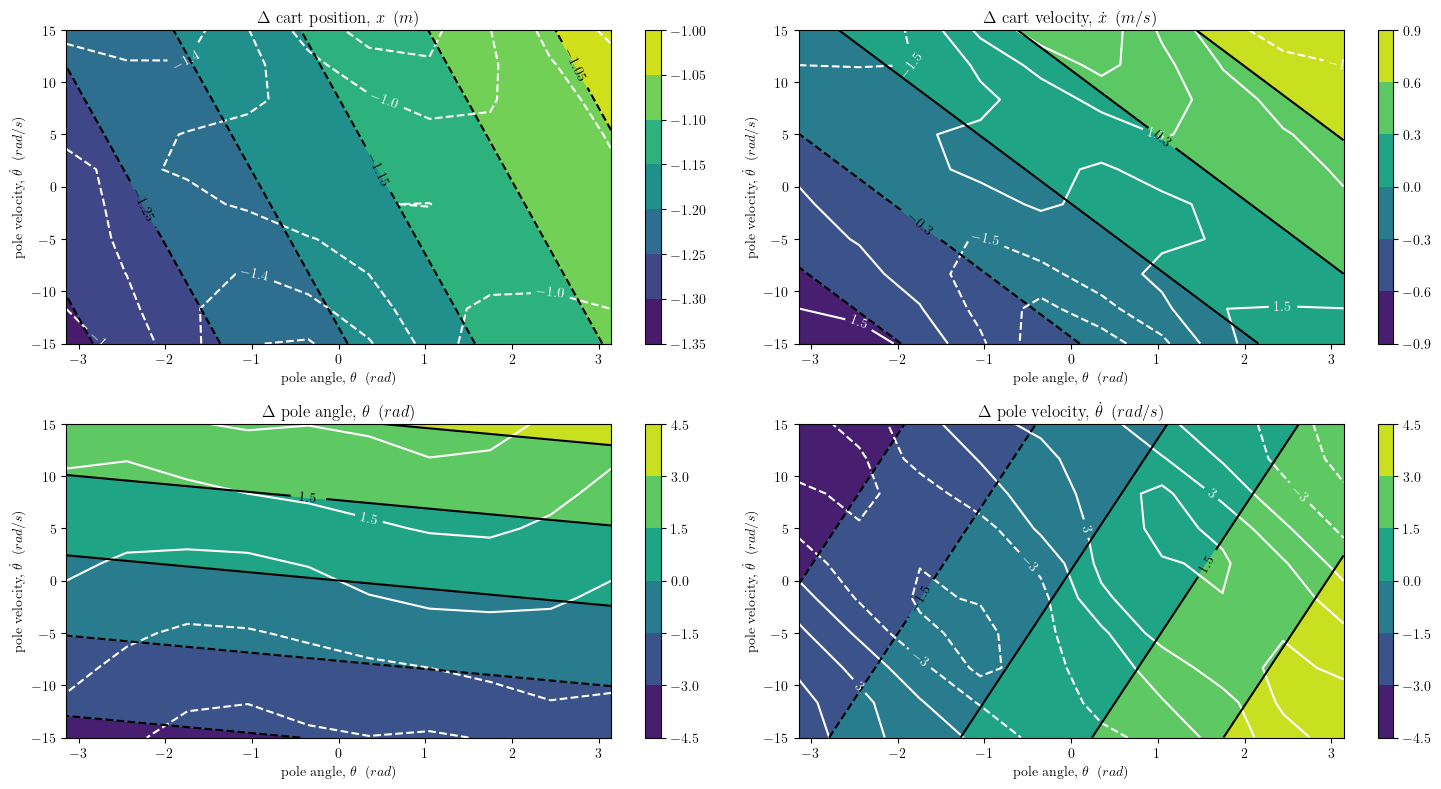

In [106]:
x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, VEL, x[i][j], y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE2, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE2, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_3__2.pgf")
fig.tight_layout()

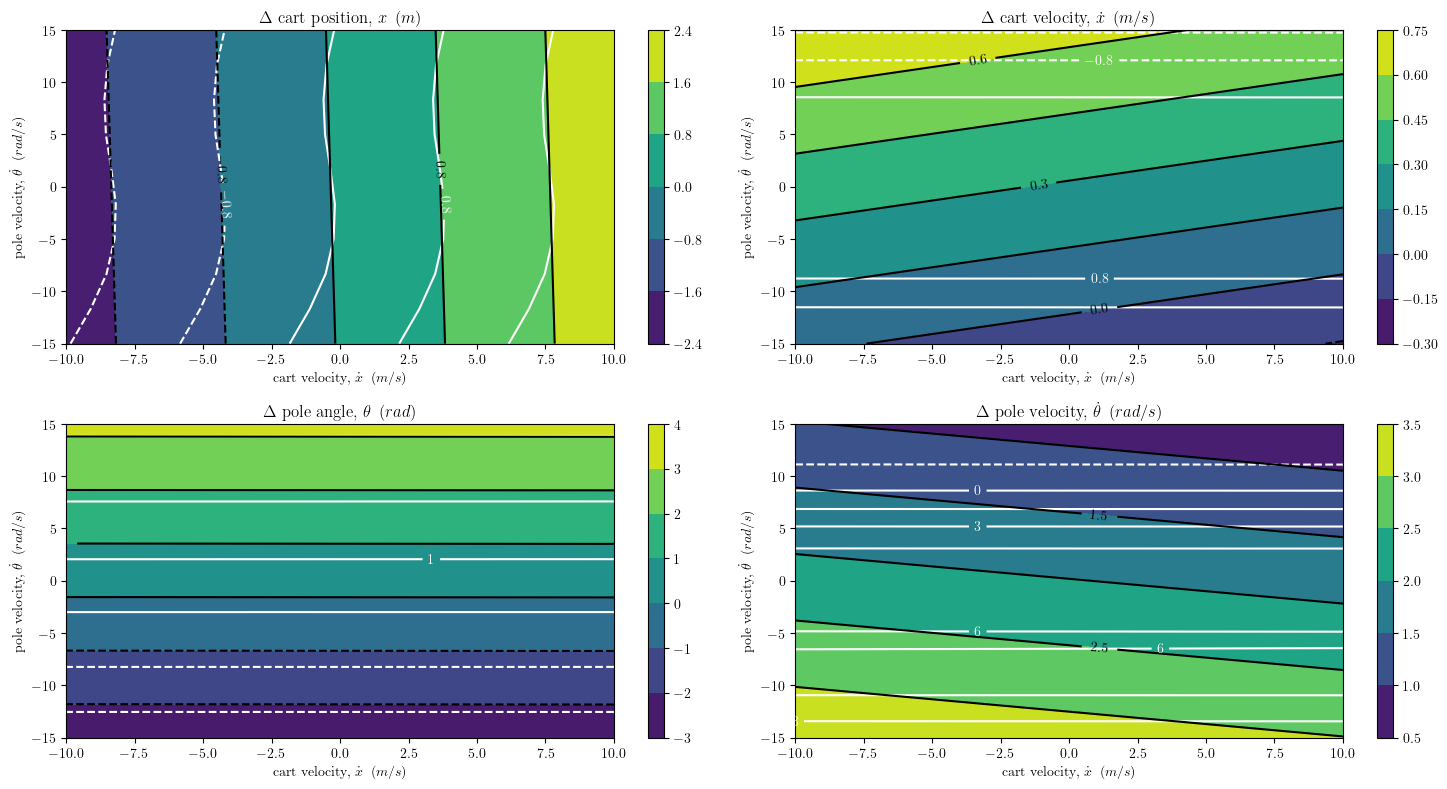

In [107]:
x, y = np.meshgrid(vels, ang_vels, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], ANG, y[i][j]])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE1, ylabel=STATE3, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_3__3.pgf")
fig.tight_layout()

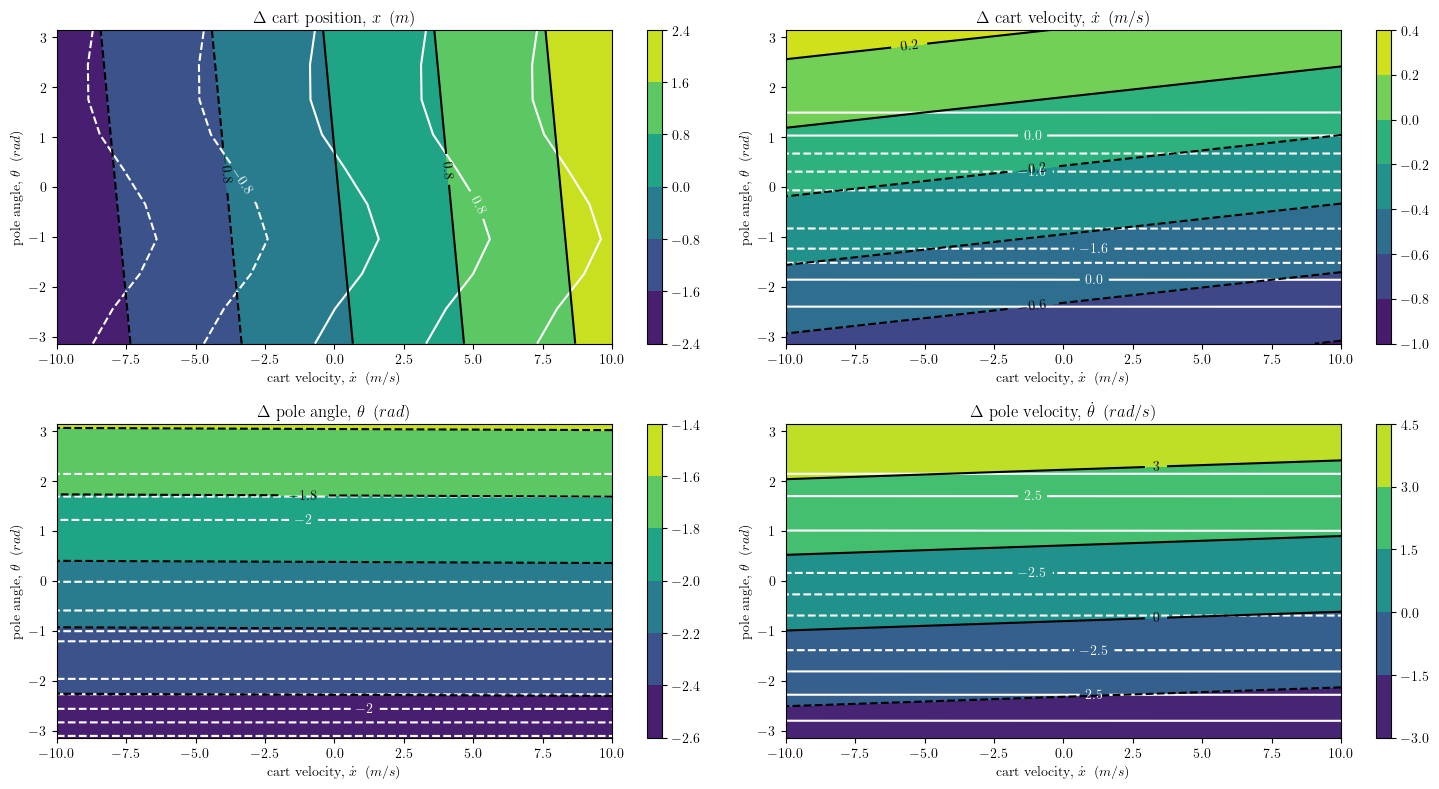

In [108]:
x, y = np.meshgrid(vels, angs, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([POS, x[i][j], y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE1, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_3__4.pgf")
fig.tight_layout()

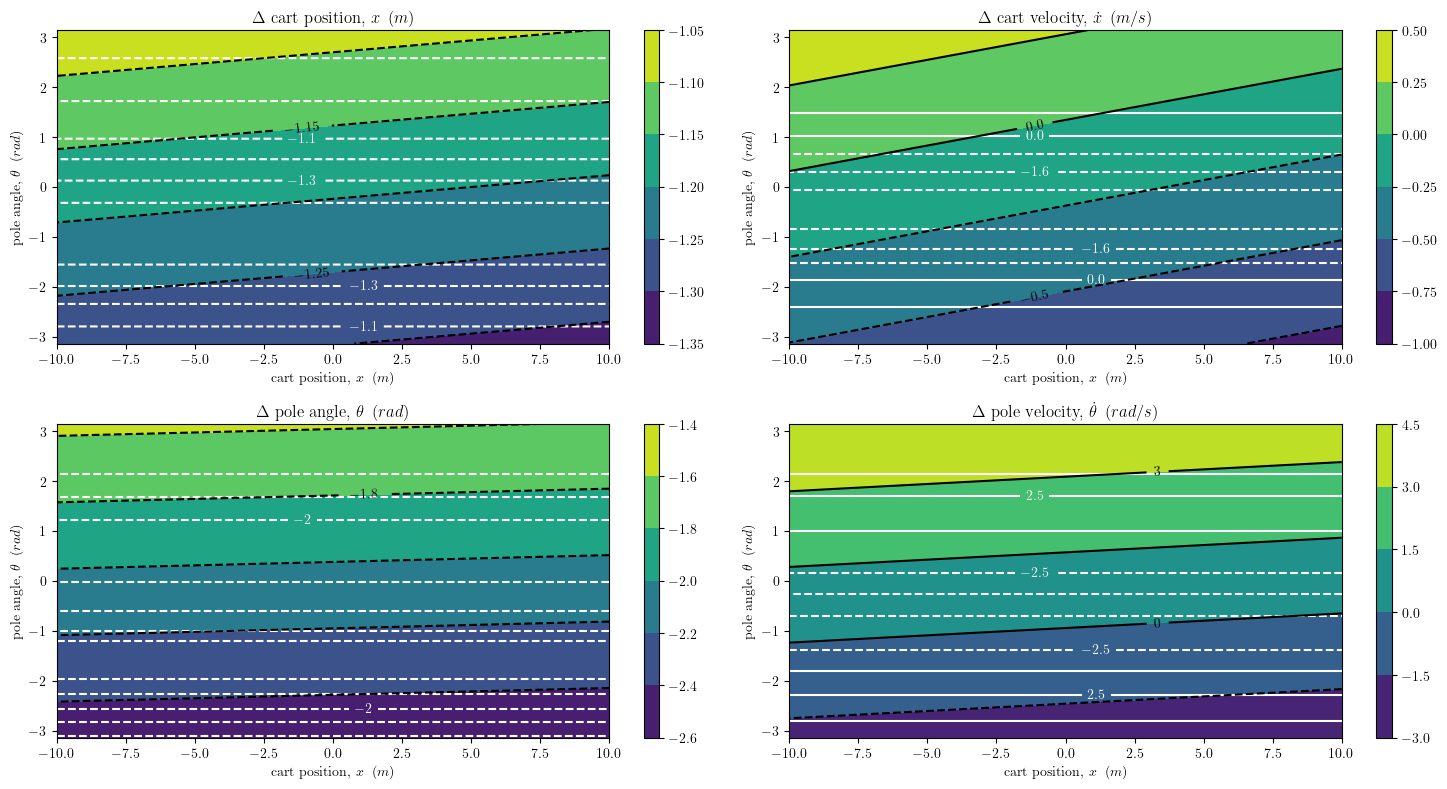

In [109]:
x, y = np.meshgrid(poss, angs, indexing='ij')
z = np.zeros(4)
z_hat = np.zeros(4)

for i in range(len(x)):
    for j in range(len(y)):
        z0 = np.array([x[i][j], VEL, y[i][j], ANG_VEL])
        cp.setState(z0)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        z_hat = np.vstack([z_hat, z0 @ W])
        cp.reset()

fig, axs = plt.subplots(2,2, figsize=(15, 8))
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
plot_states_contour(x, y, z, fig, axs, xlabel=STATE0, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='white')
plot_states_contour(x, y, z_hat, fig, axs, xlabel=STATE0, ylabel=STATE2, xlim=xlim, ylim=ylim, colors='black')

fig.savefig("./assets/task1_3__5.pgf")
fig.tight_layout()

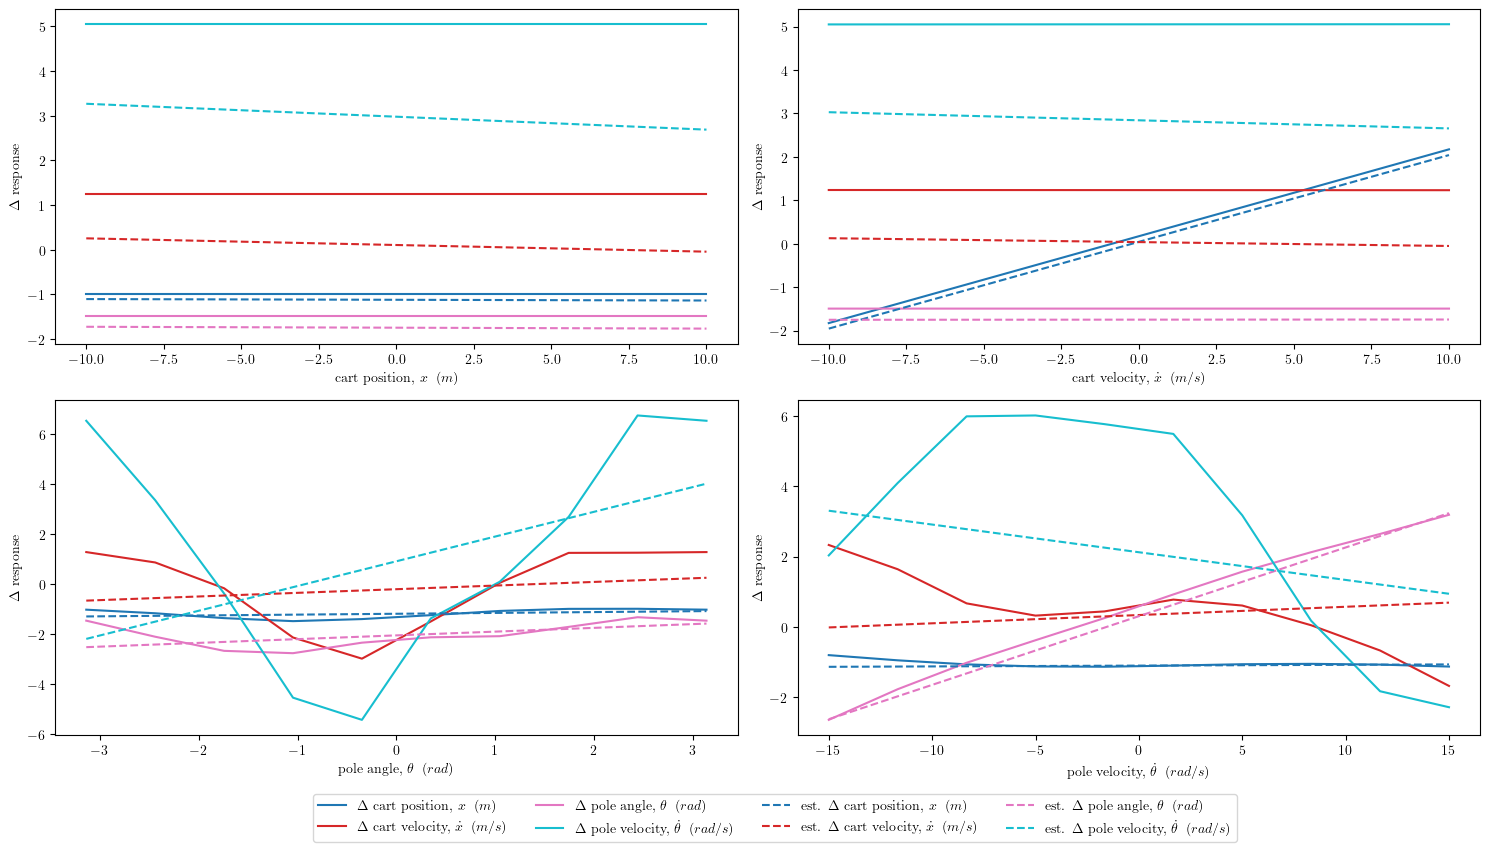

In [164]:
# Model change instead
n = 10

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

xlabels = [STATE0, STATE1, STATE2, STATE3] * 2
n_c = 4
colors = plt.cm.tab10(np.linspace(0,1,n_c))

for i, x in enumerate([poss, vels, angs, ang_vels]):  
    cp = CartPole(False)
    y = np.zeros(4)
    y_hat = np.zeros(4)

    for var in x:
        state = [POS, VEL, ANG, ANG_VEL]
        state[i] = var
        y0 = np.array(state)
        cp.setState(y0)
        cp.performAction()
        y = np.vstack([y, cp.getState() - y0])
        y_hat = np.vstack([y_hat, y0 @ W])
        cp.reset()
    
    y = y[1:, :]
    y_hat = y_hat[1:, :]
    ax = axs[i // 2][i % 2]
    plot_all_states_in_a_subplot_1_3(x, y, fig=fig, ax=ax, xlabel=xlabels[i], ylabel=f"{DELTA} response", colors=colors, linestyle='solid')
    plot_all_states_in_a_subplot_1_3(x, y_hat, fig=fig, ax=ax, xlabel=xlabels[i], ylabel=f"{DELTA} response", colors=colors, linestyle='dashed')

label1 = [DELTA + l for l in xlabels[:4]]
label2 = ["est. " + DELTA + l for l in xlabels[:4]]
fig.legend(bbox_to_anchor=(0.52, -0.06), loc="lower center", borderaxespad=0, ncol=4, labels=label1+label2)
fig.tight_layout()
fig.savefig("./assets/task1_3__6.pgf")


### Task 3.4


#### Pole angle against pole velocity

3.141592653589793 3.141592653589793


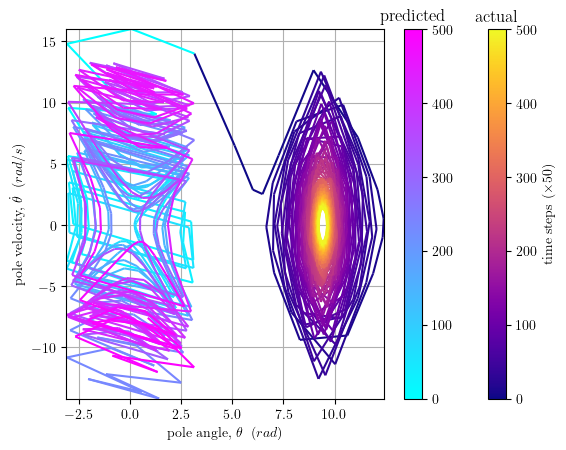

In [92]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 14])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__1.pgf")

3.141592653589793 3.141592653589793


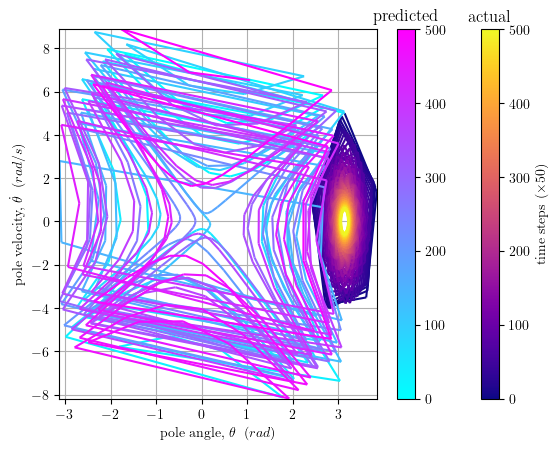

In [93]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__2.pgf")

#### Cart velocity against pole velocity

3.141592653589793 3.141592653589793


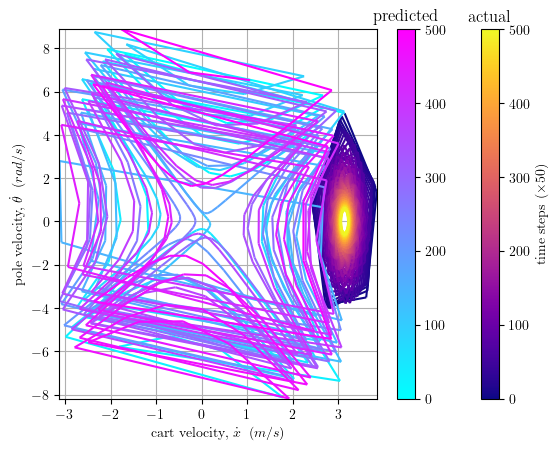

In [85]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 2], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 2], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__3.pgf")

0.0 0.0


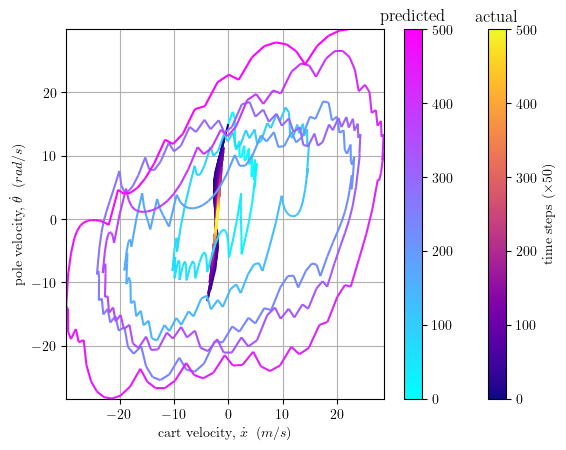

In [83]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__4.pgf")

#### Cart position against pole angle

0.0 0.0


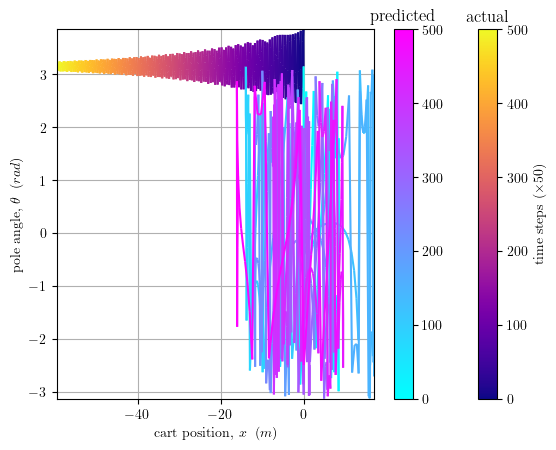

In [88]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 5])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 0], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 0], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE0)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__5.pgf")

0.0 0.0


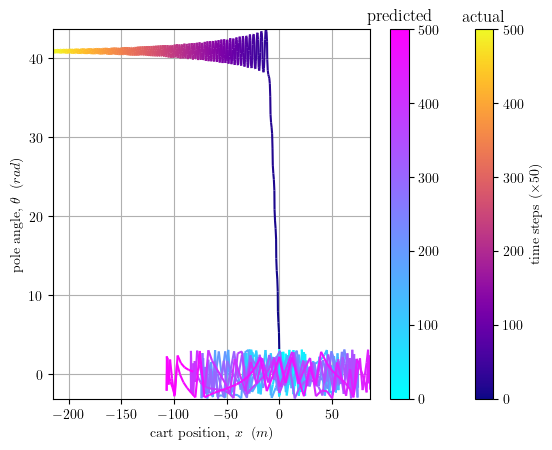

In [89]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 0], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 0], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE0)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__6.pgf")

#### Cart veloctiy against pole angle

0.0 0.0


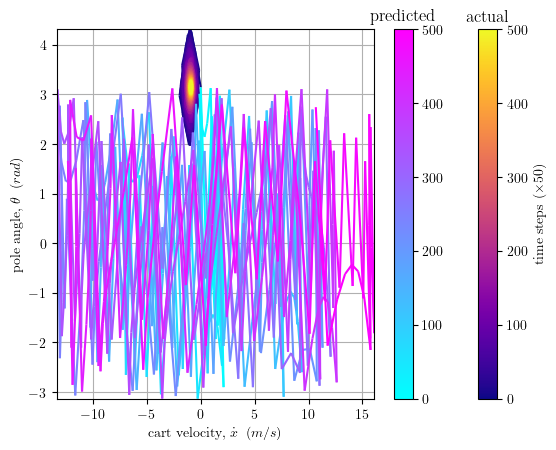

In [91]:
# Simple oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 8])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__7.pgf")

0.0 0.0


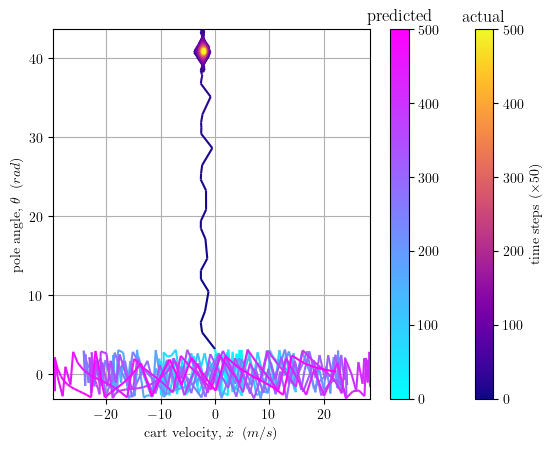

In [90]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, STABLE_VEL, STABLE_ANG, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 2]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 2]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE1)
ax.set_ylabel(STATE2)
ax.grid()
fig.savefig("./assets/task1_4__8.pgf")

15.0 15.0


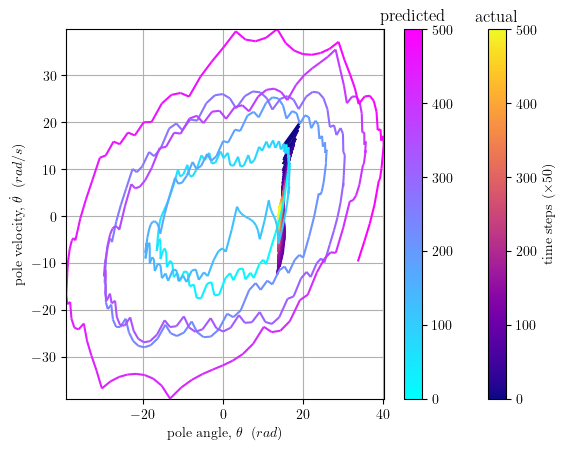

In [109]:
# Complete oscillation
n_steps = 500
steps = np.arange(n_steps)

state = np.array([STABLE_POS, 15, 0.1, 15])

response = run_simulation(state, steps)
pred_response = run_linear_model(state, W, steps)
# print(pred_response.shape[-1, :])
x00, y00 = response[:, 1], response[:, 3]
x_hat00, y_hat00 = pred_response[:, 1], pred_response[:, 3]
print(x_hat00[0], x00[0])

fig, ax = plt.subplots(1, 1)

points = np.array([x00, y00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax, label=r'time steps $(\times 50)$')
cb.ax.set_title('actual')

points = np.array([x_hat00, y_hat00]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n_steps)
lc = LineCollection(segments, cmap='cool', norm=norm)
# Set the values used for colormapping
lc.set_array(steps)
line = ax.add_collection(lc)
cb = fig.colorbar(line, ax=ax)
cb.ax.set_title('predicted')


ax.set_xlim(min(x00.min(), x_hat00.min()), max(x00.max(), x_hat00.max()))
ax.set_ylim(min(y00.min(), y_hat00.min()), max(y00.max(), y_hat00.max()))

ax.set_xlabel(STATE2)
ax.set_ylabel(STATE3)
ax.grid()
fig.savefig("./assets/task1_4__10.pgf")